İkinci proje olan regresyon projesinde ve üçüncü proje olan sınıflandırma projesinde kullandığınız veri kümelerini tekrar kullanarak, KNN ile regresyon ve sınıflandırma modelleri oluşturun ve bu modeller için en uygun parametre değerlerini belirleyin. En ideal parametreyi bulmak için daha önceki bölümde öğrendiğiniz çapraz doğrulama metotlarını kullanabilirsiniz.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('titanic_train.csv')

In [2]:
train_data['is_male'] = pd.get_dummies(train_data['Sex'],drop_first = True)
train_data.drop(labels='Sex', axis=1, inplace=True)  

# C = Cherbourg
# S = Southampton
# Q = Queenstown
train_data.Embarked = train_data.Embarked.replace('C', 1)
train_data.Embarked = train_data.Embarked.replace('Q', 2)
train_data.Embarked = train_data.Embarked.replace('S', 3)
train_data.Embarked = train_data.Embarked.replace(np.nan, 0)

train_data.dropna(subset=['Age'], how='all', inplace=True)

In [3]:
df = train_data[['Pclass','is_male','Age','Fare','Embarked','Survived']]

In [4]:
X = df[['Pclass','is_male','Age','Fare','Embarked']]
y = df['Survived']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Modelimiz oluştu. Modelimizin performansını ölçmek için KNeighborsClassifier'ın .score() metodunu kullanabiliriz.

In [7]:
knn1.score(X_test, y_test)

0.6223776223776224

# Çapraz Doğrulama

In [8]:
from sklearn.model_selection import cross_val_score
cvscores_3 = cross_val_score(knn1, X_test, y_test, cv=3)
print('cv =  3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(knn1, X_test, y_test, cv=10)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_10))

cv =  3 ---> Ortalama çarpraz doğrulama skoru :  0.566193853427896
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.6480952380952382


# K değerini belirlemek

In [9]:
komsu_sayisi = np.arange(1, 9)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

In [10]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test, y_test)

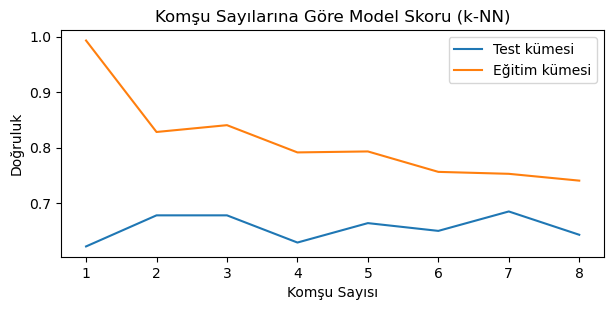

In [11]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)')
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.show()

In [12]:
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(X_train,y_train)
knn2.score(X_test,y_test)

0.6853146853146853

In [13]:
cvscores_3 = cross_val_score(knn2, X_test, y_test, cv=2)
print('cv =  3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(knn2, X_test, y_test, cv=3)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_10))

cv =  3 ---> Ortalama çarpraz doğrulama skoru :  0.5942879499217528
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.5941193853427896


# 1.Normalizasyon

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_olcekli = ss.fit_transform(X)

Şimdi verilerimizi ölçekledikten sonra tekrar eğitim ve test kümesi olarak ayırıp modelimizi oluşturabiliriz.

In [17]:
X_train_olcekli, X_test_olcekli, y_train, y_test = train_test_split(X_olcekli, y, test_size=0.2, random_state = 40)

knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_olcekli,y_train)
knn3.score(X_test_olcekli, y_test)

0.7622377622377622

Model başarısı 0.62 den 0.76 ya yükseldi.

In [18]:
knn3 = KNeighborsClassifier(n_neighbors = 7)
knn3.fit(X_train_olcekli,y_train)
knn3.score(X_test_olcekli, y_test)

0.7762237762237763

Model başarısı 0.68 den 0.78 e yükseldi.

# 2. Ağırlıklandırma

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=7, weights='distance')

In [30]:
X_zscore = stats.zscore(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state = 40)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7622377622377622

In [ ]:
Yeni k değeri ile normalleştirme daha iyi sonuç verdi.